In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import chainer
import chainer.functions as F           # パラメータを含まない関数を収録したパッケージ
import chainer.links as L               # パラメータを含む関数を収録したパッケージ
from chainer import computational_graph # グラフを出力するパッケージ
from chainer import serializers         # モデルの保存や読込を行うパッケージ

C:\Users\Soto Anno\Downloads\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(resize=0.5, color=True)

In [3]:
data = lfw_people.images
target = lfw_people.target
target_names = lfw_people.target_names

In [4]:
len(target)

13233

In [5]:
data.shape

(13233, 62, 47, 3)

In [6]:
target

array([5360, 3434, 3807, ..., 2175,  373, 2941], dtype=int64)

In [7]:
target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [8]:
len(target_names)

5749

In [10]:
# testデータのサンプルについて情報を確認する関数
def show_test_sample_info(index):
    img = data[index]
    
    # 画像を出力
    plt.imshow(img)
    plt.show()

In [11]:
# nは五十音順での名前に対応づけられたID
# 0 ~ 13232であり、この順番でA ~ Z
# 五十音順でn番目の人の写真indexを出力する関数
def img_index(n):
    for i in range(13233):
        if n == target[i]:
            print(i)

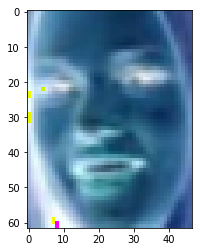

In [19]:
show_test_sample_info(2339)

In [36]:
# 名前とIDが対応づけられたDataFrameの作成

df_names = pd.DataFrame(target_names, columns = ["names"])
df_IDnum = pd.DataFrame(np.arange(len(target_names)), columns = ["IDnum"])
df_zero = pd.DataFrame(np.zeros(5749), dtype='int64')
df_names_ID = pd.concat([df_names, df_IDnum, df_zero], axis=1)
df_names_ID.columns = ["names", "IDnum", "gender"]

df_names_ID

,names,IDnum,gender
0,AJ Cook,0,0
1,AJ Lamas,1,0
2,Aaron Eckhart,2,0
3,Aaron Guiel,3,0
4,Aaron Patterson,4,0
5,Aaron Peirsol,5,0
6,Aaron Pena,6,0
7,Aaron Sorkin,7,0
8,Aaron Tippin,8,0
9,Abba Eban,9,0


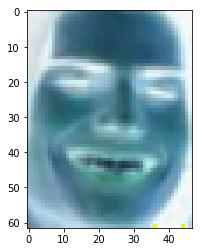

In [37]:
show_test_sample_info(11270)

In [38]:
# 性別と名前が対応づけられたデータフレームを読み込み
# あとでIDnumを対応づけるため、あらかじめIDnum欄を作る
df_names_gender = pd.read_csv("Genderlist.csv")
df_zero = pd.DataFrame(np.zeros(13233,), dtype='int64')
df_names_gender =  pd.concat([df_names_gender, df_zero], axis=1)
df_names_gender.columns = ["names", "gender", "IDnum"]

df_names_gender

,names,gender,IDnum
0,Aaron_Eckhart_0001.jpg,0,0
1,Aaron_Guiel_0001.jpg,0,0
2,Aaron_Patterson_0001.jpg,0,0
3,Aaron_Peirsol_0001.jpg,0,0
4,Aaron_Peirsol_0002.jpg,0,0
5,Aaron_Peirsol_0003.jpg,0,0
6,Aaron_Peirsol_0004.jpg,0,0
7,Aaron_Pena_0001.jpg,0,0
8,Aaron_Sorkin_0001.jpg,0,0
9,Aaron_Sorkin_0002.jpg,0,0


In [39]:
# 名前から"_"や"_0001.jpg"を削除
for i in range(13233):
    name = df_names_gender.loc[i,'names']
    new_name = ""   
    for c in name:
        if c == '_':
            c = " "
        new_name += c
        
    new_name = new_name[:-9]
    df_names_gender.loc[i,'names'] = new_name
        
            
df_names_gender
#何度も実行するとバグる

,names,gender,IDnum
0,Aaron Eckhart,0,0
1,Aaron Guiel,0,0
2,Aaron Patterson,0,0
3,Aaron Peirsol,0,0
4,Aaron Peirsol,0,0
5,Aaron Peirsol,0,0
6,Aaron Peirsol,0,0
7,Aaron Pena,0,0
8,Aaron Sorkin,0,0
9,Aaron Sorkin,0,0


In [42]:
# df_names_IDとdf_names_genderより、性別とIDnumを名前を手掛かりに対応付ける
for i in range(13233):
    for j in range(5749):
        if df_names_gender.loc[i,'names'] == df_names_ID.loc[j,'names']:
            df_names_gender.loc[i,'IDnum'] = df_names_ID.loc[j,'IDnum']
            break

In [43]:
df_names_gender_ID = df_names_gender
df_names_gender_ID

,names,gender,IDnum
0,Aaron Eckhart,0,2
1,Aaron Guiel,0,3
2,Aaron Patterson,0,4
3,Aaron Peirsol,0,5
4,Aaron Peirsol,0,5
5,Aaron Peirsol,0,5
6,Aaron Peirsol,0,5
7,Aaron Pena,0,6
8,Aaron Sorkin,0,7
9,Aaron Sorkin,0,7


In [52]:
df_names_gender_ID.to_csv("names_gender_ID")
df = pd.read_csv("names_gender_ID")
df

,Unnamed: 0,names,gender,IDnum
0,0,Aaron Eckhart,0,2
1,1,Aaron Guiel,0,3
2,2,Aaron Patterson,0,4
3,3,Aaron Peirsol,0,5
4,4,Aaron Peirsol,0,5
5,5,Aaron Peirsol,0,5
6,6,Aaron Peirsol,0,5
7,7,Aaron Pena,0,6
8,8,Aaron Sorkin,0,7
9,9,Aaron Sorkin,0,7
